![Ejercicio2](imagenes/ejercicio3.PNG) 

In [3]:
#Librerias
from sympy import *
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
from IPython.display import display, Markdown

In [4]:
#Simbolos
a = symbols('a')
b = symbols('b')
t = symbols('t')
W = Function('W')(t)

In [5]:
#Ecuacion Diferencial
ED = Eq(W.diff(t), a*W**(2/3) - b*W)
ED

Eq(Derivative(W(t), t), a*W(t)**0.666666666666667 - b*W(t))

In [6]:
#Solucion Ecuacion Diferencial
Sol = dsolve(ED)
Sol[0]

Eq(W(t), Piecewise((-C1**3*a**3/27 + C1**2*a**3*t/9 - C1*a**3*t**2/9 + a**3*t**3/27, Eq(b, 0)), (nan, True)))

In [7]:
Sol[1]

Eq(W(t), Piecewise((a**3/b**3 + 3*a**2*exp(C1*b/3 - b*t/3)/b**2 + 3*a*exp(2*C1*b/3 - 2*b*t/3)/b + exp(C1*b - b*t), Ne(b, 0)), (nan, True)))

In [8]:
#Transcribir Solucion
from sympy import symbols, solve, exp
C1 = symbols('C1')
W_solucion = (a**3/b**3) + (3*a**2 * exp(C1*b/3 - b*t/3) / b**2) + (3*a * exp(2*C1*b/3 - 2*b*t/3) / b) + exp(C1*b - b*t)
W_solucion = Eq(W,W_solucion)
W_solucion

Eq(W(t), a**3/b**3 + 3*a**2*exp(C1*b/3 - b*t/3)/b**2 + 3*a*exp(2*C1*b/3 - 2*b*t/3)/b + exp(C1*b - b*t))

In [9]:
W_solucion2 = simplify(W_solucion)
W_solucion2

Eq(W(t), (a**3 + 3*a**2*b*exp(b*(C1 - t)/3) + 3*a*b**2*exp(2*b*(C1 - t)/3) + b**3*exp(b*(C1 - t)))/b**3)

In [10]:
#Imprimir Respuesta a)
display(Markdown(f"<span style='font-size:30px; color:red;'>$$A) {latex(W_solucion2)} $$</span>"))



<span style='font-size:30px; color:red;'>$$A) W{\left(t \right)} = \frac{a^{3} + 3 a^{2} b e^{\frac{b \left(C_{1} - t\right)}{3}} + 3 a b^{2} e^{\frac{2 b \left(C_{1} - t\right)}{3}} + b^{3} e^{b \left(C_{1} - t\right)}}{b^{3}} $$</span>

------

In [11]:
from sympy import symbols, limit, oo, exp
W_infinito = W_solucion2.subs(t,oo)
W_infinito

Eq(W(oo), (a**3 + 3*a**2*b*exp(b*(C1 - oo)/3) + 3*a*b**2*exp(2*b*(C1 - oo)/3) + b**3*exp(b*(C1 - oo)))/b**3)

In [12]:
W_infinito2 = Eq(W,((a**3 + 3*a**2*b*0/3) + 3*a*b**2*0 + b**3*0) / b**3)
W_infinito2 = W_infinito2.subs(t,oo)
W_infinito2

Eq(W(oo), a**3/b**3)

In [13]:
#Imprimir Respuesta B)
display(Markdown(f"<span style='font-size:30px; color:red;'>$$B) {latex(W_infinito2)} $$</span>"))

<span style='font-size:30px; color:red;'>$$B) W{\left(\infty \right)} = \frac{a^{3}}{b^{3}} $$</span>

-----------

In [14]:
W_solucion2

Eq(W(t), (a**3 + 3*a**2*b*exp(b*(C1 - t)/3) + 3*a*b**2*exp(2*b*(C1 - t)/3) + b**3*exp(b*(C1 - t)))/b**3)

In [34]:
#Despejar C1
c1 = solve(W_solucion2,C1)[0]
c1 = Eq(C1, c1)
c1

Eq(C1, (b*t - 3*log(b) + log(-(a - b*W(t)**(1/3))**3))/b)

In [35]:
#Condicion inicial W(0)=0
#Sustituir W = 0
c1_sol1 = c1.subs(W,0)
c1_sol1

Eq(C1, (b*t + log(-a**3) - 3*log(b))/b)

In [36]:
#Condicion inicial W(0)=0
#Sustituir t = 0
c1_sol2 = c1_sol1.subs(t,0)
c1_sol2

Eq(C1, (log(-a**3) - 3*log(b))/b)

In [37]:
#Remplazar C1 
W_sol3 = W_solucion2.subs(C1,c1_sol2.rhs)
W_sol3

Eq(W(t), (a**3 + 3*a**2*b*exp(b*(-t + (log(-a**3) - 3*log(b))/b)/3) + 3*a*b**2*exp(2*b*(-t + (log(-a**3) - 3*log(b))/b)/3) + b**3*exp(b*(-t + (log(-a**3) - 3*log(b))/b)))/b**3)

In [38]:
#Imprimir Respuesta B)
display(Markdown(f"<span style='font-size:20px;'>$$B) {latex(W_sol3)} $$</span>"))

<span style='font-size:20px;'>$$B) W{\left(t \right)} = \frac{a^{3} + 3 a^{2} b e^{\frac{b \left(- t + \frac{\log{\left(- a^{3} \right)} - 3 \log{\left(b \right)}}{b}\right)}{3}} + 3 a b^{2} e^{\frac{2 b \left(- t + \frac{\log{\left(- a^{3} \right)} - 3 \log{\left(b \right)}}{b}\right)}{3}} + b^{3} e^{b \left(- t + \frac{\log{\left(- a^{3} \right)} - 3 \log{\left(b \right)}}{b}\right)}}{b^{3}} $$</span>

In [60]:
display(Markdown(f"<span style='font-size:20px;'>Suponiendo a y b son constates = 2 </span>"))
display(Markdown(f"<span style='font-size:20px;'>a = 2 </span>"))
display(Markdown(f"<span style='font-size:20px;'>b = 2 </span>"))

<span style='font-size:20px;'>Suponiendo a y b son constates = 2 </span>

<span style='font-size:20px;'>a = 2 </span>

<span style='font-size:20px;'>b = 2 </span>

In [54]:
#Remplazar a = 1
W_sol4 = W_sol3.subs(a,2)
W_sol4

Eq(W(t), (b**3*exp(b*(-t + (-3*log(b) + log(8) + I*pi)/b)) + 6*b**2*exp(2*b*(-t + (-3*log(b) + log(8) + I*pi)/b)/3) + 12*b*exp(b*(-t + (-3*log(b) + log(8) + I*pi)/b)/3) + 8)/b**3)

In [61]:
#Remplazar b = 1
W_sol5 = W_sol4.subs(b,2)
W_sol5

Eq(W(t), 3*exp(-4*t/3 + 2*I*pi/3) + 3*exp(-2*t/3 + I*pi/3) + 1 - exp(-2*t))

In [62]:
display(Markdown(f"<center><span style='font-size:30px;'>Suponiendo a = 2 y b = 2</span></center>"))
display(Markdown(f"<span style='font-size:20px;'>$$B) {latex(W_sol5)} $$</span>"))

<center><span style='font-size:30px;'>Suponiendo a = 2 y b = 2</span></center>

<span style='font-size:20px;'>$$B) W{\left(t \right)} = 3 e^{- \frac{4 t}{3} + \frac{2 i \pi}{3}} + 3 e^{- \frac{2 t}{3} + \frac{i \pi}{3}} + 1 - e^{- 2 t} $$</span>

In [67]:
#Crear funcion
def W1(t):
    return 3 * np.exp(-4*t/3 + 2j*np.pi/3) + 3 * np.exp(-2*t/3 + 1j*np.pi/3) + 1 - np.exp(-2*t)

In [68]:
W1(2)

(1.272854891450654+0.8653687556239733j)

In [74]:
latex(W_sol5)

'W{\\left(t \\right)} = 3 e^{- \\frac{4 t}{3} + \\frac{2 i \\pi}{3}} + 3 e^{- \\frac{2 t}{3} + \\frac{i \\pi}{3}} + 1 - e^{- 2 t}'

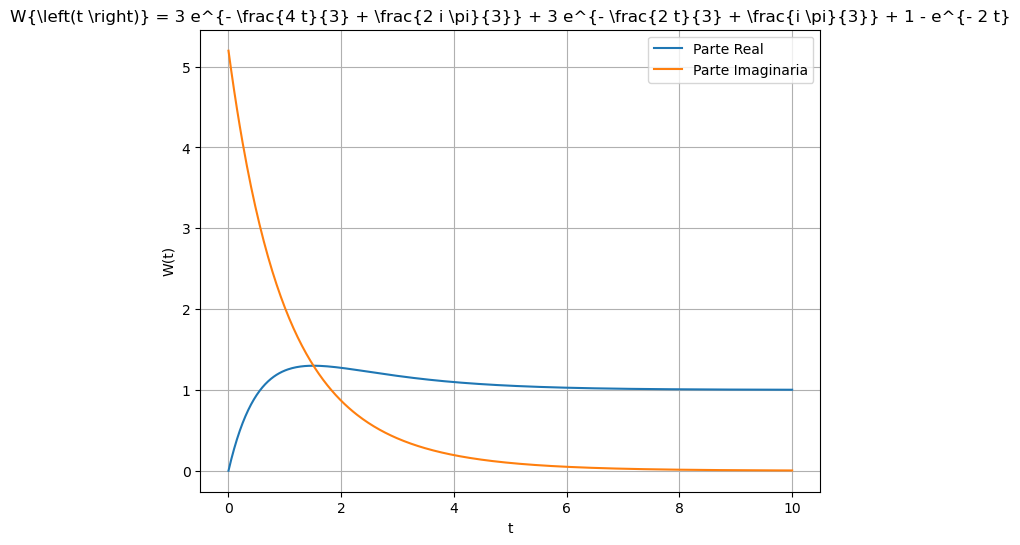

In [76]:
# Creamos un rango de valores para t
t_values = np.linspace(0, 10, 400)

# Evaluamos la función en el rango de valores de t
W_values = W1(t_values)

# Graficamos la parte real e imaginaria de la función
figure(figsize=(8, 6))
plot(t_values, np.real(W_values), label='Parte Real')
plot(t_values, np.imag(W_values), label='Parte Imaginaria')
xlabel('t')
ylabel('W(t)')
title('W{\\left(t \\right)} = 3 e^{- \\frac{4 t}{3} + \\frac{2 i \\pi}{3}} + 3 e^{- \\frac{2 t}{3} + \\frac{i \\pi}{3}} + 1 - e^{- 2 t}')
legend()
grid(True)
show()

In [110]:
W_sol25 = W_solucion2.subs(a,1)
W_sol26 = W_sol25.subs(b,1)
W_sol26

Eq(W(t), 3*exp(C1/3 - t/3) + 3*exp(2*C1/3 - 2*t/3) + exp(C1 - t) + 1)

In [115]:
W_sol27 = W_sol26.subs(W,0)
W_sol27

Eq(0, 3*exp(C1/3 - t/3) + 3*exp(2*C1/3 - 2*t/3) + exp(C1 - t) + 1)

In [112]:
W_sol27 = W_sol26.subs(t,0)
W_sol27

Eq(W(0), 3*exp(2*C1/3) + 3*exp(C1/3) + exp(C1) + 1)

In [117]:
c1_sol7 = solve(W_sol27,C1)
c1_sol7

[]

In [108]:
c1_sol7[0].subs(W,0)

log(((-1/2 - sqrt(3)*I/2)*W(0)**(1/3) - 1)**3)

In [98]:
W_sol28 = W_sol27.subs(W,0)
W_sol28

Eq(W(0), 3*exp(2*C1/3) + 3*exp(C1/3) + exp(C1) + 1)